# Домашня робота №7

# Перетворення випадкових величин

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import uniform, expon, norm, geom

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

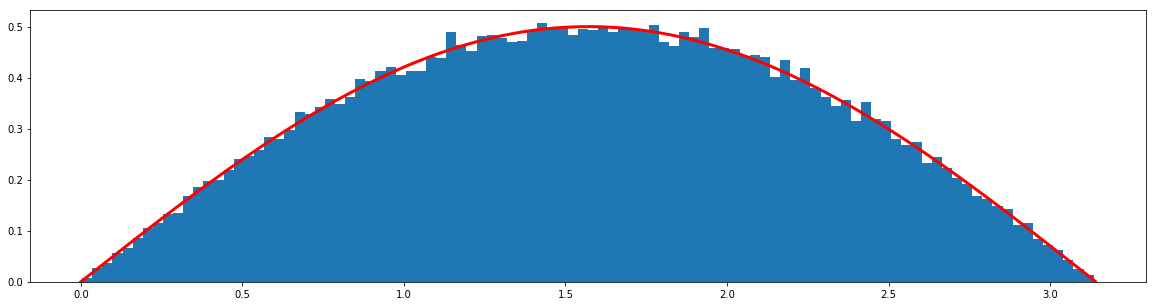

In [3]:
# функція щільності xi
def density_f(x):
    a = 0.5
    return a * np.sin(x)

# функція, обернена до функції розподілу xi
def rfunc(y):
    return np.arccos(1 - 2 * y)

fig, axs = plt.subplots(1,1, figsize=(20,5))

eta = uniform(loc=0, scale=1)

lst_f = rfunc(eta.rvs(size=10 ** 5))
axs.hist(lst_f, normed=True, bins=100)
x = np.arange(0, np.pi, 0.01)
axs.plot(x, density_f(x), color='r', lw=3)
plt.show()

### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

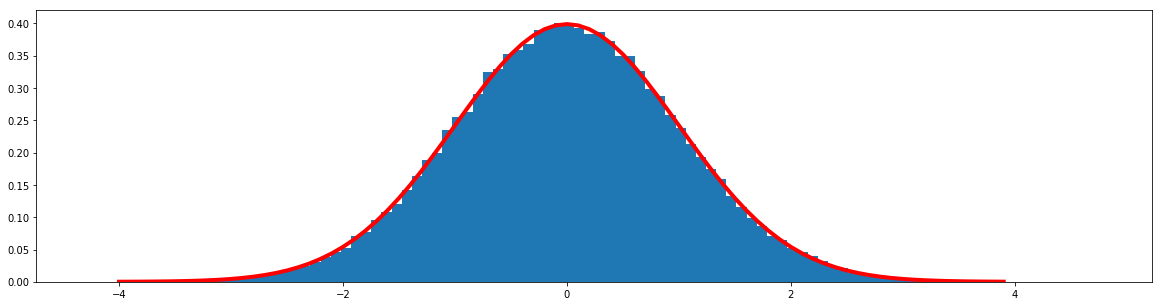

In [4]:
fig, axs = plt.subplots(1,1, figsize=(20,5))

xi = norm(0, 1)
eta = uniform(loc=0, scale=1)

vals_eta = eta.rvs(size=100000)
vals_xi = xi.ppf(vals_eta)
axs.hist(vals_xi, normed=True, bins=100)
x = np.arange(-4, 4, 0.1)
axs.plot(x, xi.pdf(x), 'r', lw=4)

plt.show()

## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

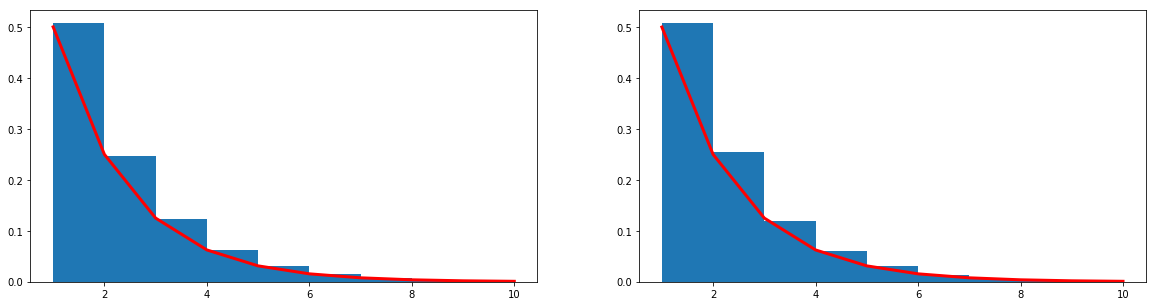

In [5]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

xi = geom(0.5)
vals = xi.rvs(size=10000)
x = np.arange(1, 11)
axs[0].hist(vals, normed=True, bins=x)
axs[0].plot(x, xi.pmf(x), 'r', lw=3)

axs[1].hist(xi.rvs(size=10000) - 1, normed=True, bins=x)
axs[1].plot(x, xi.pmf(x), 'r', lw=3)
plt.show()

## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

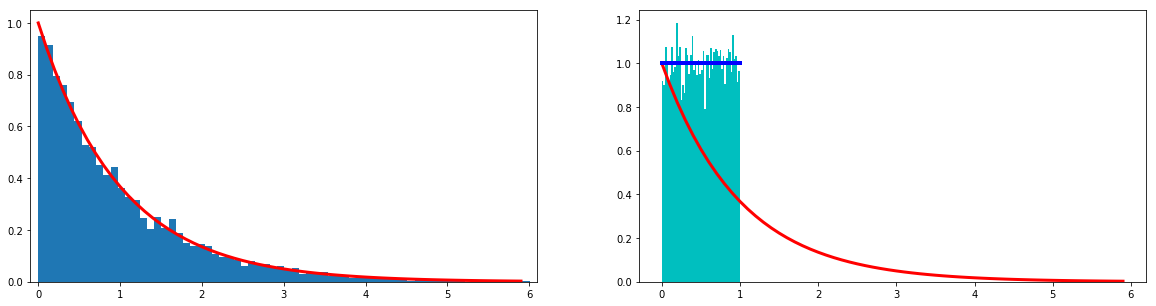

In [6]:
def func1(xi):
    return np.exp(-xi)


def denc1(y):
    return np.ones((1, len(y)))

fig, axs = plt.subplots(1,2, figsize=(20,5))

xi = expon(loc=0, scale=1)
xi_rvs = xi.rvs(size=10000)

x1 = np.arange(0, 6, 0.1)
axs[0].hist(xi_rvs, normed=True, bins=100)
axs[0].plot(x1, xi.pdf(x1), 'r', lw=3)
axs[0].set_xlim(-0.1, 6.1)

axs[1].hist(func1(xi_rvs), normed=True, bins=50, color='c')
axs[1].plot(x1, xi.pdf(x1), 'r', lw=3)
x2 = np.arange(0, 1.1, 0.1)
axs[1].plot(x2, denc1(x2)[0], 'b', lw=4)
plt.show()

### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

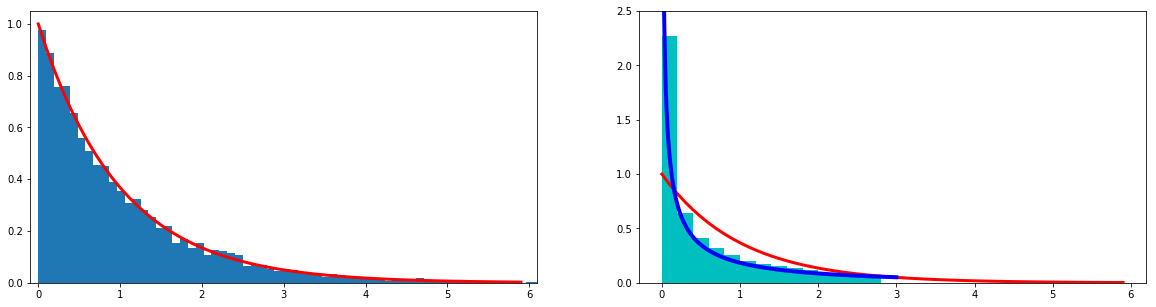

In [7]:
def func2(xi):
    return xi ** 2


def denc2(y):
    return np.exp(-y ** 0.5) / (2 * y ** 0.5)

fig, axs = plt.subplots(1,2, figsize=(20,5))

xi_rvs = xi.rvs(size=10000)
x1 = np.arange(0, 6, 0.1)
axs[0].hist(xi_rvs, normed=True, bins=100)
axs[0].plot(x1, xi.pdf(x1), 'r', lw=3)
axs[0].set_xlim(-0.1, 6.1)

axs[1].hist(func2(xi_rvs), normed=True, bins=np.arange(0, 3, 0.2), color='c')
x2 = np.arange(0.01, 3.01, 0.01)
axs[1].plot(x1, xi.pdf(x1), 'r', lw=3)
axs[1].plot(x2, denc2(x2), 'b', lw=4)
axs[1].set_ylim(0, 2.5)
plt.show()

## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

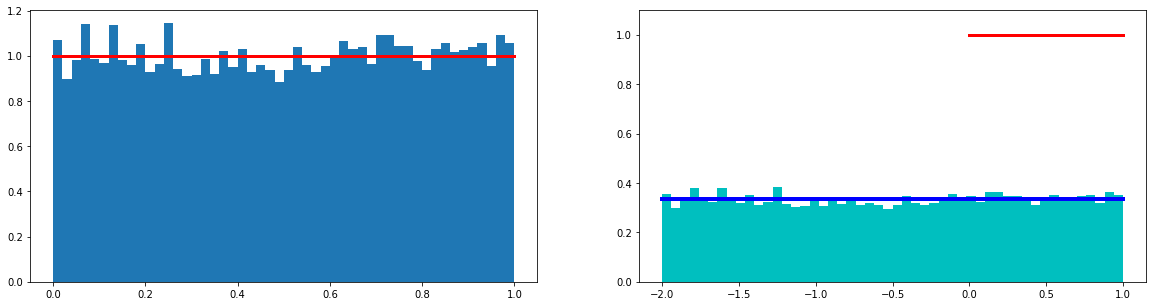

In [8]:
def func2(xi):
    return 3 * xi - 2


def denc2(y):
    return  np.ones((len(y))) / 3 

fig, axs = plt.subplots(1,2, figsize=(20,5))
xi = uniform(loc=0, scale=1)

xi_rvs = xi.rvs(size=10000)
x1 = np.arange(0, 1.1, 0.1)
axs[0].hist(xi_rvs, normed=True, bins=50)
axs[0].plot(x1, xi.pdf(x1), 'r', lw=3)

axs[1].hist(func2(xi_rvs), normed=True, bins=50, color='c')
axs[1].plot(x1, xi.pdf(x1), 'r', lw=3)
x2 = np.arange(-2, 1.1, 0.1)
axs[1].plot(x2, denc2(x2), 'b', lw=4)
axs[1].set_ylim(0, 1.1)

plt.show()


### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

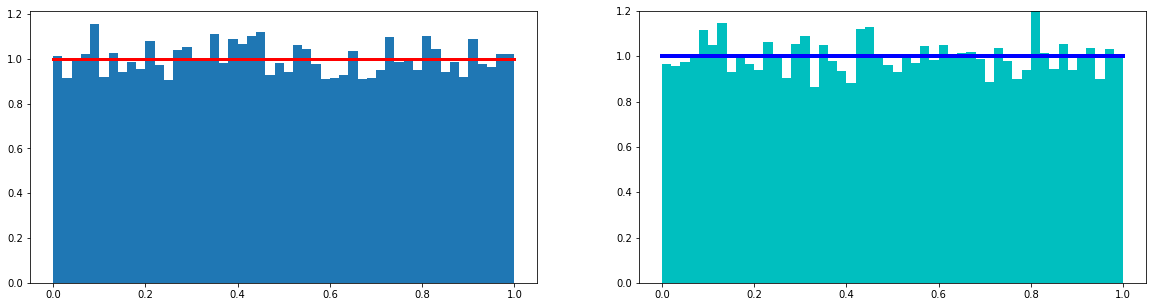

In [10]:
def func2(xi):
    return abs(2 * xi - 1)


def denc2(y):
    return  np.ones((len(y)))

fig, axs = plt.subplots(1,2, figsize=(20,5))
xi = uniform(loc=0, scale=1)

xi_rvs = xi.rvs(size=10000)
x1 = np.arange(0, 1.1, 0.1)
axs[0].hist(xi_rvs, normed=True, bins=50)
axs[0].plot(x1, xi.pdf(x1), 'r', lw=3)

axs[1].hist(func2(xi_rvs), normed=True, bins=50, color='c')
axs[1].plot(x1, xi.pdf(x1), 'r', lw=3)
x2 = np.arange(0, 1.1, 0.1)
axs[1].plot(x2, denc2(x2), 'b', lw=4)
axs[1].set_ylim(0, 1.2)

plt.show()

### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

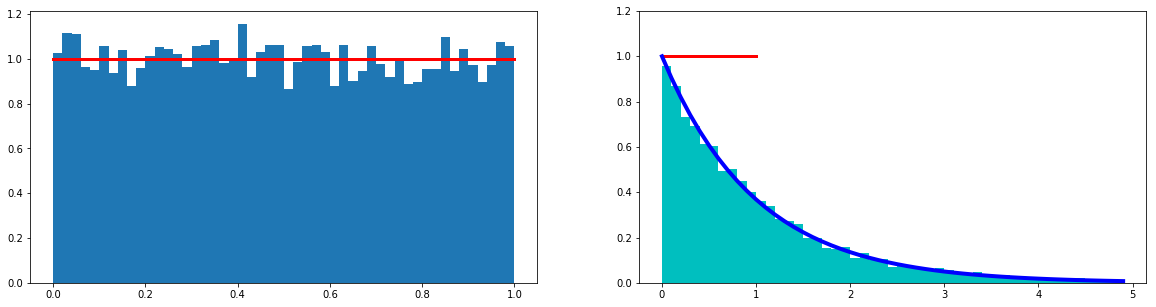

In [11]:
def func2(xi):
    return -np.log(xi)


def denc2(y):
    return  np.exp(-y)

fig, axs = plt.subplots(1,2, figsize=(20,5))
xi = uniform(loc=0, scale=1)

xi_rvs = xi.rvs(size=10000)
x1 = np.arange(0, 1.1, 0.1)
axs[0].hist(xi_rvs, normed=True, bins=50)
axs[0].plot(x1, xi.pdf(x1), 'r', lw=3)

x2 = np.arange(0, 5, 0.1)
axs[1].hist(func2(xi_rvs), normed=True, bins=x2, color='c')
axs[1].plot(x1, xi.pdf(x1), 'r', lw=3)
axs[1].plot(x2, denc2(x2), 'b', lw=4)
axs[1].set_ylim(0, 1.2)

plt.show()



## 5 Одиничний квадрат

Реалізуйте випадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [24]:
xi = uniform(loc=0, scale=1)

n = 10 ** 5
xi1_rvs = xi.rvs(size=n)
xi2_rvs = xi.rvs(size=n)

Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

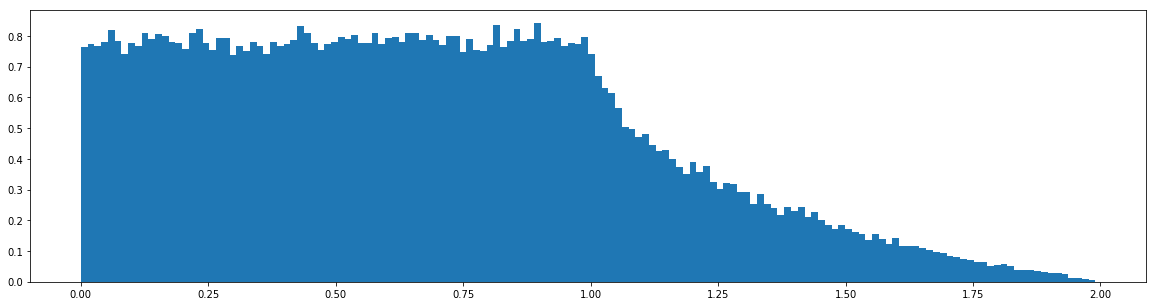

In [28]:
def func1(x, y):
    return x ** 2 + y ** 2
    
    
def denc1(vect):
    return 0.5 / np.sqrt(vect)
    
    
fig, axs = plt.subplots(1, 1, figsize=(20,5))
axs.hist(func1(xi1_rvs, xi2_rvs), normed=True, bins=150)
x2 = np.arange(0.005, 1.005, 0.01)
# axs.plot(x, x / x, 1 + x, denc1(x + 1) color='r', lw=4)

plt.show()

Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

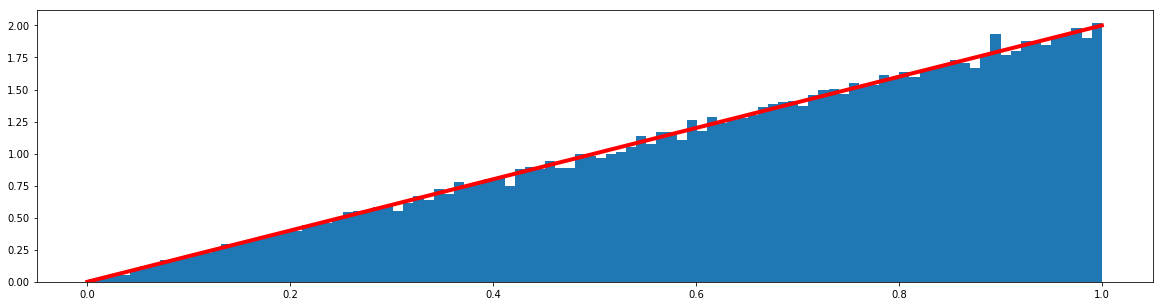

In [14]:
def func2(x, y):
    return np.maximum(x, y)
    

def dens2(x):
    return 2 * x
    
fig, axs = plt.subplots(1, 1, figsize=(20,5))
axs.hist(func2(xi1_rvs, xi2_rvs), normed=True, bins=100)
x = np.arange(0, 1.02, 0.02)
axs.plot(x, dens2(x), color='r', lw=4)

plt.show()

Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

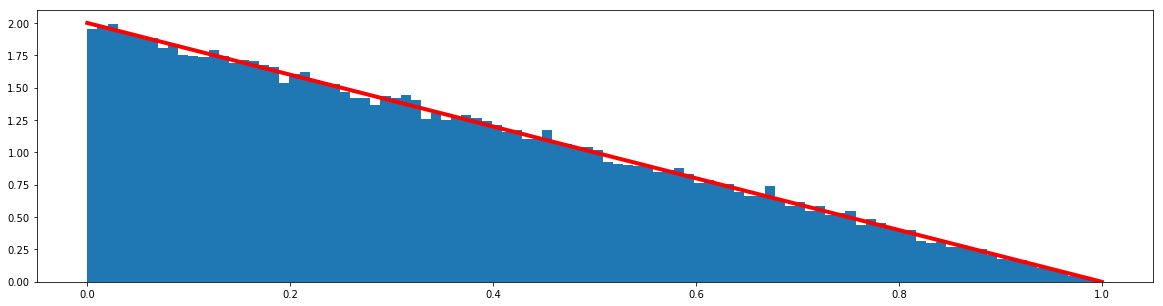

In [15]:
def func3(x, y):
    return abs(x - y)
    
    
def dens3(x):
    return 2 * (1 - x)

 
fig, axs = plt.subplots(1, 1, figsize=(20,5))
axs.hist(func3(xi1_rvs, xi2_rvs), normed=True, bins=100)
x = np.arange(0, 1.02, 0.02)
axs.plot(x, dens3(x), color='r', lw=4)

plt.show()